# Preenchimento híbrido das tabelas de fluxo
Considerando os dois tipos de preenchimento de tabelas, proativo e reativo, podemos utilizar uma abordagem híbrida, onde o controlador inicia a rede preenchendo todas as tabelas dos nós baseando-se em informações pré-definidas. Em seguida, a rede utiliza do preenchimento reativo, onde o controlador define as novas linhas das tabelas se baseando nos requests e informações da rede.

In [1]:
from quantumnet.components import Controller, Network
from quantumnet.utils import generate_random_request

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


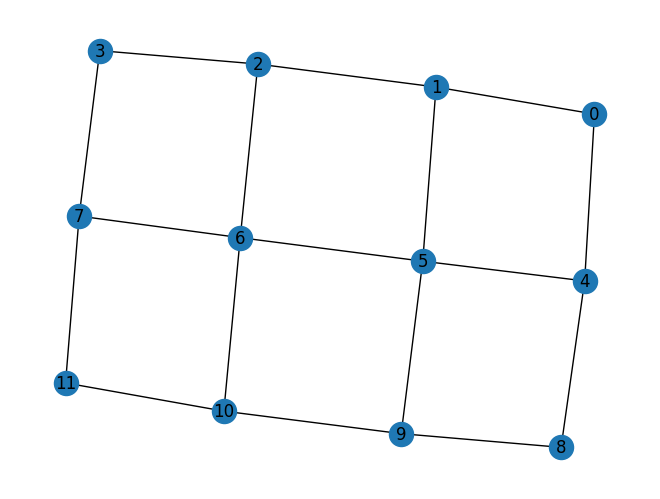

In [2]:
rede = Network()
controlador = Controller(rede)
row, col = 3, 4
rede.set_ready_topology("Grade", row, col)
rede.draw()

### Preenchendo com modo proativo

In [3]:
# Preenchimento proativo da tabela de fluxos
hosts = rede.hosts
for alice in hosts:
    print("Preenchendo a tabela do Host", alice)
    for bob in hosts:
        controlador.add_match_route_rule_in_host_proactive(alice=alice, bob=bob, fmin=0.5, neprs=2)
        controlador.add_match_route_rule_in_host_proactive(alice=alice, bob=bob, fmin=0.9, neprs=3)

Preenchendo a tabela do Host 0
Preenchendo a tabela do Host 1
Preenchendo a tabela do Host 2
Preenchendo a tabela do Host 3
Preenchendo a tabela do Host 4
Preenchendo a tabela do Host 5
Preenchendo a tabela do Host 6
Preenchendo a tabela do Host 7
Preenchendo a tabela do Host 8
Preenchendo a tabela do Host 9
Preenchendo a tabela do Host 10
Preenchendo a tabela do Host 11


In [4]:
# Tabelas de fluxo após preenchimento
for host in hosts:
    print(f"Tabela de fluxo do Host {host}:")
    rede.get_host(host).draw_flow_table()

Tabela de fluxo do Host 0:
+--------------+----------------------+--------------------+
| Match        | Route                | Rule               |
+==============+======================+====================+
| (0, 0.5, 2)  | [0]                  | BasicRuleProactive |
+--------------+----------------------+--------------------+
| (0, 0.9, 3)  | [0]                  | BasicRuleProactive |
+--------------+----------------------+--------------------+
| (1, 0.5, 2)  | [0, 1]               | BasicRuleProactive |
+--------------+----------------------+--------------------+
| (1, 0.9, 3)  | [0, 1]               | BasicRuleProactive |
+--------------+----------------------+--------------------+
| (2, 0.5, 2)  | [0, 1, 2]            | BasicRuleProactive |
+--------------+----------------------+--------------------+
| (2, 0.9, 3)  | [0, 1, 2]            | BasicRuleProactive |
+--------------+----------------------+--------------------+
| (3, 0.5, 2)  | [0, 1, 2, 3]         | BasicRuleProactive

### Preenchendo com modo reativo

In [5]:
# Criação de requisições
num_hosts = len(rede.hosts) - 1
fmin_range = (0.5, 1)
neprs_range = (2, 4)
num_requests = 100
print("Hosts:", num_hosts)
requests = list(generate_random_request(num_hosts, fmin_range, neprs_range) for i in range(num_requests))
print("Requisições:", requests)

Hosts: 11
Requisições: [[7, 3, 0.87, 2], [2, 1, 0.79, 4], [9, 6, 0.8, 3], [8, 2, 0.61, 3], [6, 9, 0.82, 2], [6, 7, 0.93, 4], [4, 7, 0.65, 4], [7, 3, 0.98, 2], [10, 3, 0.61, 3], [3, 2, 0.67, 4], [6, 5, 0.71, 3], [5, 4, 0.64, 4], [9, 10, 0.93, 2], [3, 9, 0.57, 3], [5, 6, 0.75, 4], [5, 10, 0.56, 2], [10, 1, 0.91, 3], [10, 0, 0.75, 3], [0, 1, 0.8, 4], [6, 2, 0.76, 4], [2, 7, 0.88, 2], [0, 7, 0.75, 2], [8, 3, 0.82, 3], [9, 2, 0.63, 3], [8, 3, 0.6, 4], [7, 0, 0.97, 2], [9, 3, 0.69, 4], [5, 3, 0.8, 3], [10, 5, 0.51, 2], [2, 3, 0.97, 2], [5, 10, 0.74, 2], [7, 10, 0.55, 3], [10, 4, 0.92, 2], [9, 6, 0.57, 4], [8, 7, 0.52, 4], [4, 2, 0.73, 4], [9, 2, 0.72, 3], [4, 3, 0.89, 2], [10, 2, 0.84, 2], [4, 10, 0.63, 4], [4, 1, 0.99, 4], [4, 6, 0.79, 3], [9, 6, 0.85, 3], [6, 8, 0.63, 2], [3, 5, 0.6, 2], [8, 2, 0.54, 3], [2, 4, 0.73, 4], [6, 5, 0.55, 3], [1, 3, 0.51, 4], [6, 3, 0.71, 4], [4, 5, 0.87, 2], [0, 8, 0.63, 3], [9, 5, 0.91, 3], [1, 8, 0.5, 4], [9, 7, 0.85, 3], [1, 4, 0.58, 2], [1, 6, 0.9, 4], [9,

In [ ]:
# Percorrer todas as requests
for request in requests:
    alice = rede.get_host(request[0])
    # Encontra a regra na tabela de fluxo, caso não exista, adiciona e executa
    rule = alice.find_rule_by_request(request)
    if rule == False:
        controlador.add_match_route_rule_in_host_reactive(request)
    else:
        controlador.run_rule(rule[1])

([7, 3], BasicRuleProactive)
Tempo: 1
Executando ação: CreateEPR(7-3)
Decisão aplicada: (Normal E2E,)
([9, 5, 6], BasicRuleProactive)
Tempo: 1
Executando ação: CreateEPR(9-5)
Executando ação: CreateEPR(5-6)
Tempo: 2
Executando ação: Swap(9-5-6)
Running Swap(9-5-6)
([8, 4, 0, 1, 2], BasicRuleProactive)
Tempo: 1
Executando ação: CreateEPR(8-4)
Executando ação: CreateEPR(4-0)
Executando ação: CreateEPR(0-1)
Executando ação: CreateEPR(1-2)
Tempo: 2
Executando ação: Swap(8-4-0)
Running Swap(8-4-0)
Executando ação: Swap(0-1-2)
Running Swap(0-1-2)
Tempo: 3
Executando ação: Swap(8-0-2)
Running Swap(8-0-2)
([6, 5, 9], BasicRuleProactive)
Tempo: 1
Executando ação: CreateEPR(6-5)
Executando ação: CreateEPR(5-9)
Tempo: 2
Executando ação: Swap(6-5-9)
Running Swap(6-5-9)
Decisão aplicada: (High Fidelity,)
Decisão aplicada: (Normal E2E,)
Decisão aplicada: (High Fidelity,)
([10, 6, 2, 3], BasicRuleProactive)
Tempo: 1
Executando ação: CreateEPR(10-6)
Executando ação: CreateEPR(6-2)
Executando ação: Cre

In [7]:
# Tabelas de fluxo após preenchimento
for host in hosts:
    print(f"Tabela de fluxo do Host {host}:")
    rede.get_host(host).draw_flow_table()

Tabela de fluxo do Host 0:
+--------------+----------------------+--------------------+
| Match        | Route                | Rule               |
+==============+======================+====================+
| (0, 0.5, 2)  | [0]                  | BasicRuleProactive |
+--------------+----------------------+--------------------+
| (0, 0.9, 3)  | [0]                  | BasicRuleProactive |
+--------------+----------------------+--------------------+
| (1, 0.5, 2)  | [0, 1]               | BasicRuleProactive |
+--------------+----------------------+--------------------+
| (1, 0.9, 3)  | [0, 1]               | BasicRuleProactive |
+--------------+----------------------+--------------------+
| (2, 0.5, 2)  | [0, 1, 2]            | BasicRuleProactive |
+--------------+----------------------+--------------------+
| (2, 0.9, 3)  | [0, 1, 2]            | BasicRuleProactive |
+--------------+----------------------+--------------------+
| (3, 0.5, 2)  | [0, 1, 2, 3]         | BasicRuleProactive